In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from os import getcwd

from tensorflow.keras import regularizers

import tensorflow.keras.utils as ku 
import numpy as np 

In [6]:
tokenizer = Tokenizer()
path_sonnets = f"{getcwd()}/../tmp2/sonnets.txt"
data = open(path_sonnets).read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# input sequences
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

print(input_sequences[:-1,:-1])

[[   0    0    0 ...    0   34  417]
 [   0    0    0 ...   34  417  877]
 [   0    0    0 ...  417  877  166]
 ...
 [   0    0    0 ...  493  493 3210]
 [   0    0    0 ...  493 3210   15]
 [   0    0    0 ... 3210   15   14]]


In [3]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer='l2'))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [4]:
 history = model.fit(predictors, label, 
                     epochs=50, 
                     batch_size=128, 
                     verbose=1)

Train on 15462 samples
Epoch 1/50
15462/15462 [==============================] - 22s 1ms/sample - loss: 7.3101 - accuracy: 0.0209
Epoch 2/50
15462/15462 [==============================] - 9s 601us/sample - loss: 6.5558 - accuracy: 0.0215
Epoch 3/50
15462/15462 [==============================] - 9s 595us/sample - loss: 6.4611 - accuracy: 0.0238
Epoch 4/50
15462/15462 [==============================] - 10s 666us/sample - loss: 6.3833 - accuracy: 0.0280
Epoch 5/50
15462/15462 [==============================] - 10s 673us/sample - loss: 6.2963 - accuracy: 0.0314
Epoch 6/50
15462/15462 [==============================] - 11s 718us/sample - loss: 6.2191 - accuracy: 0.0328
Epoch 7/50
15462/15462 [==============================] - 28s 2ms/sample - loss: 6.1536 - accuracy: 0.0371
Epoch 8/50
15462/15462 [==============================] - 20s 1ms/sample - loss: 6.0851 - accuracy: 0.0404
Epoch 9/50
15462/15462 [==============================] - 19s 1ms/sample - loss: 6.0176 - accuracy: 0.0444
Epoch 

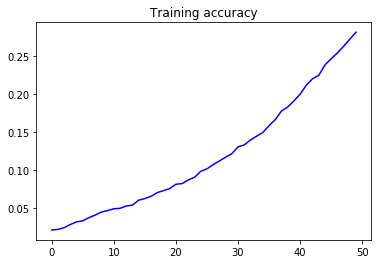

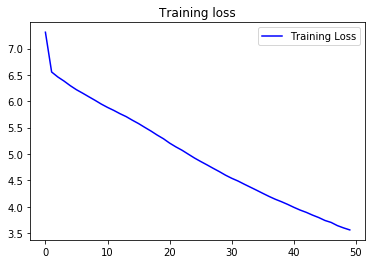

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [6]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope that thy heart doth lie it grows to be groan so ground thee grows is die die die die go wide face inhearse prove thee thee ground ground ground ground ' ' toil'd go doth grow strange time thence go wastes heir face prove held wrong grow told die die die ' ' go doth prove die die misuse thee so bear his way brow brow place kings dyed brow light woe skill subscribes slow behind strange time due to kings die die go ' and in me foes twain twain needing held go wide face prove wrong prove forth
